In [2]:
conda install pandas tensorflow

Channels:
 - defaults
 - conda-forge
Platform: osx-64
Solving environment: done

## Package Plan ##

  environment location: /Users/yattmeo/Documents/GitHub/DMBAT7/.conda

  added / updated specs:
    - pandas
    - tensorflow


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    abseil-cpp-20220623.0      |       hddbf539_6          16 KB  conda-forge
    cryptography-42.0.5        |   py39h30e54ef_0         1.2 MB
    flatbuffers-22.12.06       |       hf0c8a7f_2         1.2 MB  conda-forge
    google-auth-oauthlib-0.4.4 |     pyhd3eb1b0_0          18 KB
    grpc-cpp-1.51.1            |       h88f4db0_1          21 KB  conda-forge
    grpcio-1.51.1              |   py39h1890eb7_1         666 KB  conda-forge
    icu-70.1                   |       h96cf925_0        13.1 MB  conda-forge
    keras-2.11.0               |           py39_0         1.6 MB
    libabseil-20220623.0       | cxx17_h84

In [3]:
conda install numpy matplotlib scikit-learn

Channels:
 - defaults
 - conda-forge
Platform: osx-64
Solving environment: done

## Package Plan ##

  environment location: /Users/yattmeo/Documents/GitHub/DMBAT7/.conda

  added / updated specs:
    - matplotlib
    - numpy
    - scikit-learn


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    mkl_fft-1.3.1              |   py39h7ae3660_1         186 KB  conda-forge
    mkl_random-1.2.2           |   py39h4d6be9b_0         317 KB  conda-forge
    scipy-1.12.0               |   py39ha516a68_0        21.9 MB
    ------------------------------------------------------------
                                           Total:        22.4 MB

The following NEW packages will be INSTALLED:

  libopenblas        pkgs/main/osx-64::libopenblas-0.3.21-h54e7dc3_0 

The following packages will be UPDATED:

  blas                                              1.0-mkl --> 1.0-openblas 
  mkl_fft           

In [19]:
conda install tensorflow --upgrade


Note: you may need to restart the kernel to use updated packages.


usage: conda-script.py [-h] [--no-plugins] [-V] COMMAND ...
conda-script.py: error: unrecognized arguments: --upgrade


In [9]:
#This recurrent neural network is only relying on the paragraphs of text to determine if Human or AI.

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense

# Load the data from the CSV file
df = pd.read_csv('feature_output_10k_final.csv')

# Split the data into features (X) and labels (y)
# Define a mapping dictionary
mapping = {'Human': 0, 'AI': 1}

# Create a new column 'label_numeric' with mapped values
df['label_numeric'] = df['label'].map(mapping)
y = df['label_numeric']

# Encode the labels
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

X = df['text']

# Tokenize the text data
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X)
sequences = tokenizer.texts_to_sequences(X)
word_index = tokenizer.word_index

# Pad sequences to ensure uniform length
max_length = 500  # Adjust this value based on the maximum length of your paragraphs
padded_sequences = pad_sequences(sequences, maxlen=max_length)

print("First 10 sequences:")
for sequence in sequences[:10]:
    print(sequence)

First 10 sequences:
[612, 46, 17, 404, 8, 4, 773, 1428, 5, 1155, 318, 3, 4878, 46, 1681, 9, 8, 501, 2, 241, 7, 105, 445, 2, 459, 3, 46, 1215, 8, 1, 831, 2, 4, 2387, 3, 464, 79, 6, 18, 470, 19, 32, 1637, 1, 855, 5, 612, 46, 17, 404, 3, 71, 9, 1196, 2, 4878, 46, 1681, 764, 105, 445, 2, 459, 8, 501, 6, 495, 2, 560, 46, 430, 3, 4320, 43, 11, 14, 20, 445, 2, 459, 11, 14, 20, 114, 2, 1265, 241, 46, 17, 7782, 3, 4463, 18, 15, 193, 2, 2265, 3, 3154, 28, 11, 72, 229, 459, 2003, 430, 7, 14, 20, 869, 1542, 2, 11, 17, 1, 67, 509, 106, 11, 14, 445, 2, 459, 11, 14, 114, 2, 933, 46, 17, 1963, 3, 532, 3, 75, 503, 1155, 49, 24, 714, 342, 3, 2223, 674, 612, 46, 17, 404, 403, 11, 2, 496, 4, 791, 479, 5, 404, 1085, 43, 11, 14, 445, 2, 459, 11, 14, 114, 2, 735, 46, 17, 5943, 3, 64, 515, 7, 14, 6, 1827, 24, 46, 1215, 18, 15, 193, 2, 4, 714, 479, 5, 15305, 28, 11, 14, 114, 2, 1754, 81, 10, 7, 11, 119, 6, 3, 5837, 459, 546, 3729, 25, 9304, 18, 1085, 15, 12, 2841, 6, 1155, 46, 430, 3, 2003, 46, 1681, 28, 9, 40

In [3]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(padded_sequences, y, test_size=0.2, random_state=42)

# Define the maximum length of the input sequences (i.e., the maximum number of words in each paragraph)
max_length = padded_sequences.shape[1]

# Define the size of the vocabulary (plus 1 to account for the padding token)
vocab_size = len(word_index) + 1

# Define the neural network architecture
model = Sequential()
model.add(Embedding(input_dim=vocab_size, output_dim=100))
model.add(LSTM(units=128))
model.add(Dense(units=1, activation='sigmoid'))

In [4]:
# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test), verbose=1)

Epoch 1/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 46s 179ms/step - accuracy: 0.7470 - loss: 0.5264 - val_accuracy: 0.8225 - val_loss: 0.4962
Epoch 2/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 43s 174ms/step - accuracy: 0.8964 - loss: 0.2683 - val_accuracy: 0.9670 - val_loss: 0.1062
Epoch 3/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 44s 176ms/step - accuracy: 0.9236 - loss: 0.1968 - val_accuracy: 0.9420 - val_loss: 0.1656
Epoch 4/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 45s 181ms/step - accuracy: 0.9580 - loss: 0.1266 - val_accuracy: 0.8905 - val_loss: 0.2964
Epoch 5/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 44s 177ms/step - accuracy: 0.9645 - loss: 0.1039 - val_accuracy: 0.9685 - val_loss: 0.1043
Epoch 6/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 44s 176ms/step - accuracy: 0.9900 - loss: 0.0369 - val_accuracy: 0.9720 - val_loss: 0.0908
Epoch 7/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 44s 176ms/step - accuracy: 0.9950 - loss: 0.0199 - val_accuracy: 0.9325 - val_loss: 0.2306
Epoch 8/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 44s 176ms/step - accuracy: 0.9891 - loss: 0

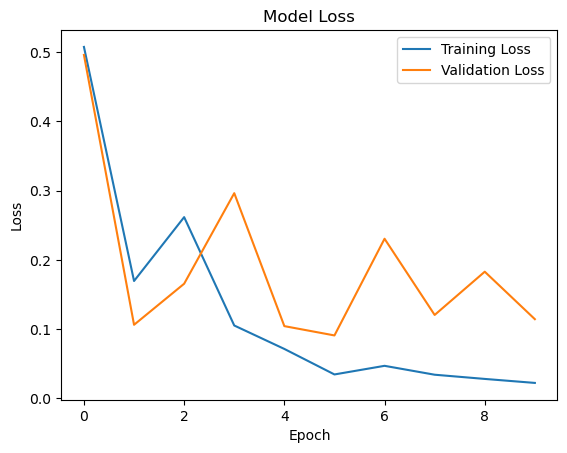

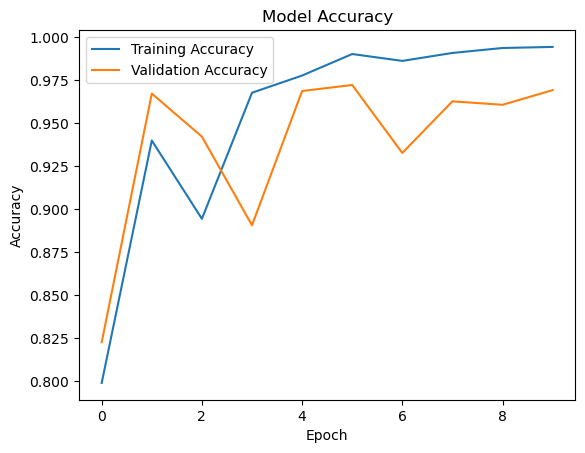

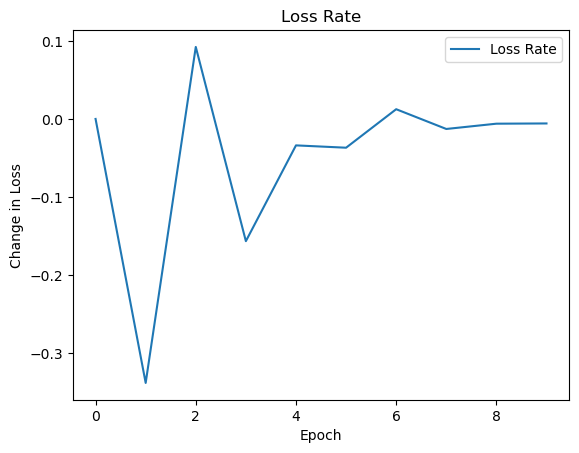

In [5]:
import matplotlib.pyplot as plt

# Plot the training loss and validation loss for every epoch
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot the training accuracy and validation accuracy for every epoch
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Calculate and plot the loss rate (change in loss) over time
loss_rate = [0]  # Loss rate for the first epoch is assumed to be 0
for i in range(1, len(history.history['loss'])):
    loss_rate.append(history.history['loss'][i] - history.history['loss'][i-1])

plt.plot(loss_rate, label='Loss Rate')
plt.title('Loss Rate')
plt.xlabel('Epoch')
plt.ylabel('Change in Loss')
plt.legend()
plt.show()

In [7]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(X_test, y_test)
print('\nTest accuracy:', test_acc)

# Make predictions on the test set
y_pred = (model.predict(X_test) > 0.5).astype(int)

# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Print the confusion matrix
print("Confusion Matrix:")
print(conf_matrix)

def evaluate_metrics(y_true, y_pred):
    # Calculate evaluation metrics
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    
    # Return the evaluation metrics
    return accuracy, precision, recall, f1

accuracy, precision, recall, f1 = evaluate_metrics(y_test, y_pred)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

63/63 ━━━━━━━━━━━━━━━━━━━━ 4s 69ms/step - accuracy: 0.9627 - loss: 0.1363

Test accuracy: 0.968999981880188
63/63 ━━━━━━━━━━━━━━━━━━━━ 4s 60ms/step
Confusion Matrix:
[[1262   16]
 [  46  676]]
Accuracy: 0.969
Precision: 0.976878612716763
Recall: 0.9362880886426593
F1 Score: 0.9561527581329561


In [9]:
# Load the new dataset
new_df = pd.read_csv('ai_human_with_features4.csv')  # Replace 'ai_human_with_features4.csv' with the path to your new dataset

# Assign ground truth labels for the new dataset
new_y_true = new_df['generated']

# Tokenize the text data using the same tokenizer used for training data
new_sequences = tokenizer.texts_to_sequences(new_df['text'])
new_padded_sequences = pad_sequences(new_sequences, maxlen=max_length)

# Make predictions on the new dataset
new_y_pred = (model.predict(new_padded_sequences) > 0.5).astype(int)

# Calculate the confusion matrix for the new dataset
new_conf_matrix = confusion_matrix(new_y_true, new_y_pred)

# Print the confusion matrix for the new dataset
print("Confusion Matrix for the New Dataset:")
print(new_conf_matrix)

# Calculate evaluation metrics for the new dataset
new_accuracy, new_precision, new_recall, new_f1 = evaluate_metrics(new_y_true, new_y_pred)
print("Accuracy for the New Dataset:", new_accuracy)
print("Precision for the New Dataset:", new_precision)
print("Recall for the New Dataset:", new_recall)
print("F1 Score for the New Dataset:", new_f1)

63/63 ━━━━━━━━━━━━━━━━━━━━ 4s 60ms/step
Confusion Matrix for the New Dataset:
[[983  17]
 [ 66 934]]
Accuracy for the New Dataset: 0.9585
Precision for the New Dataset: 0.982124079915878
Recall for the New Dataset: 0.934
F1 Score for the New Dataset: 0.9574577139928242
